<a href="https://colab.research.google.com/github/SEEMANTULANISCHAL/Data_Mining/blob/main/Statistical_Data_Mining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

I have used python to complete my assignment. I have loaded all the dataset from the open source github available url link.



*   I have plotted pair plots using the seaborn where I used it in order to get the histograms.




1 (a)  Present some visualizations of this data such as pair plots and
histograms? Do you think any scaling or transformation is required?

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/selva86/datasets/master/College.csv"
college = pd.read_csv(url)


In [ ]:
numeric_cols = college.select_dtypes(include=['float64', 'int64']).columns

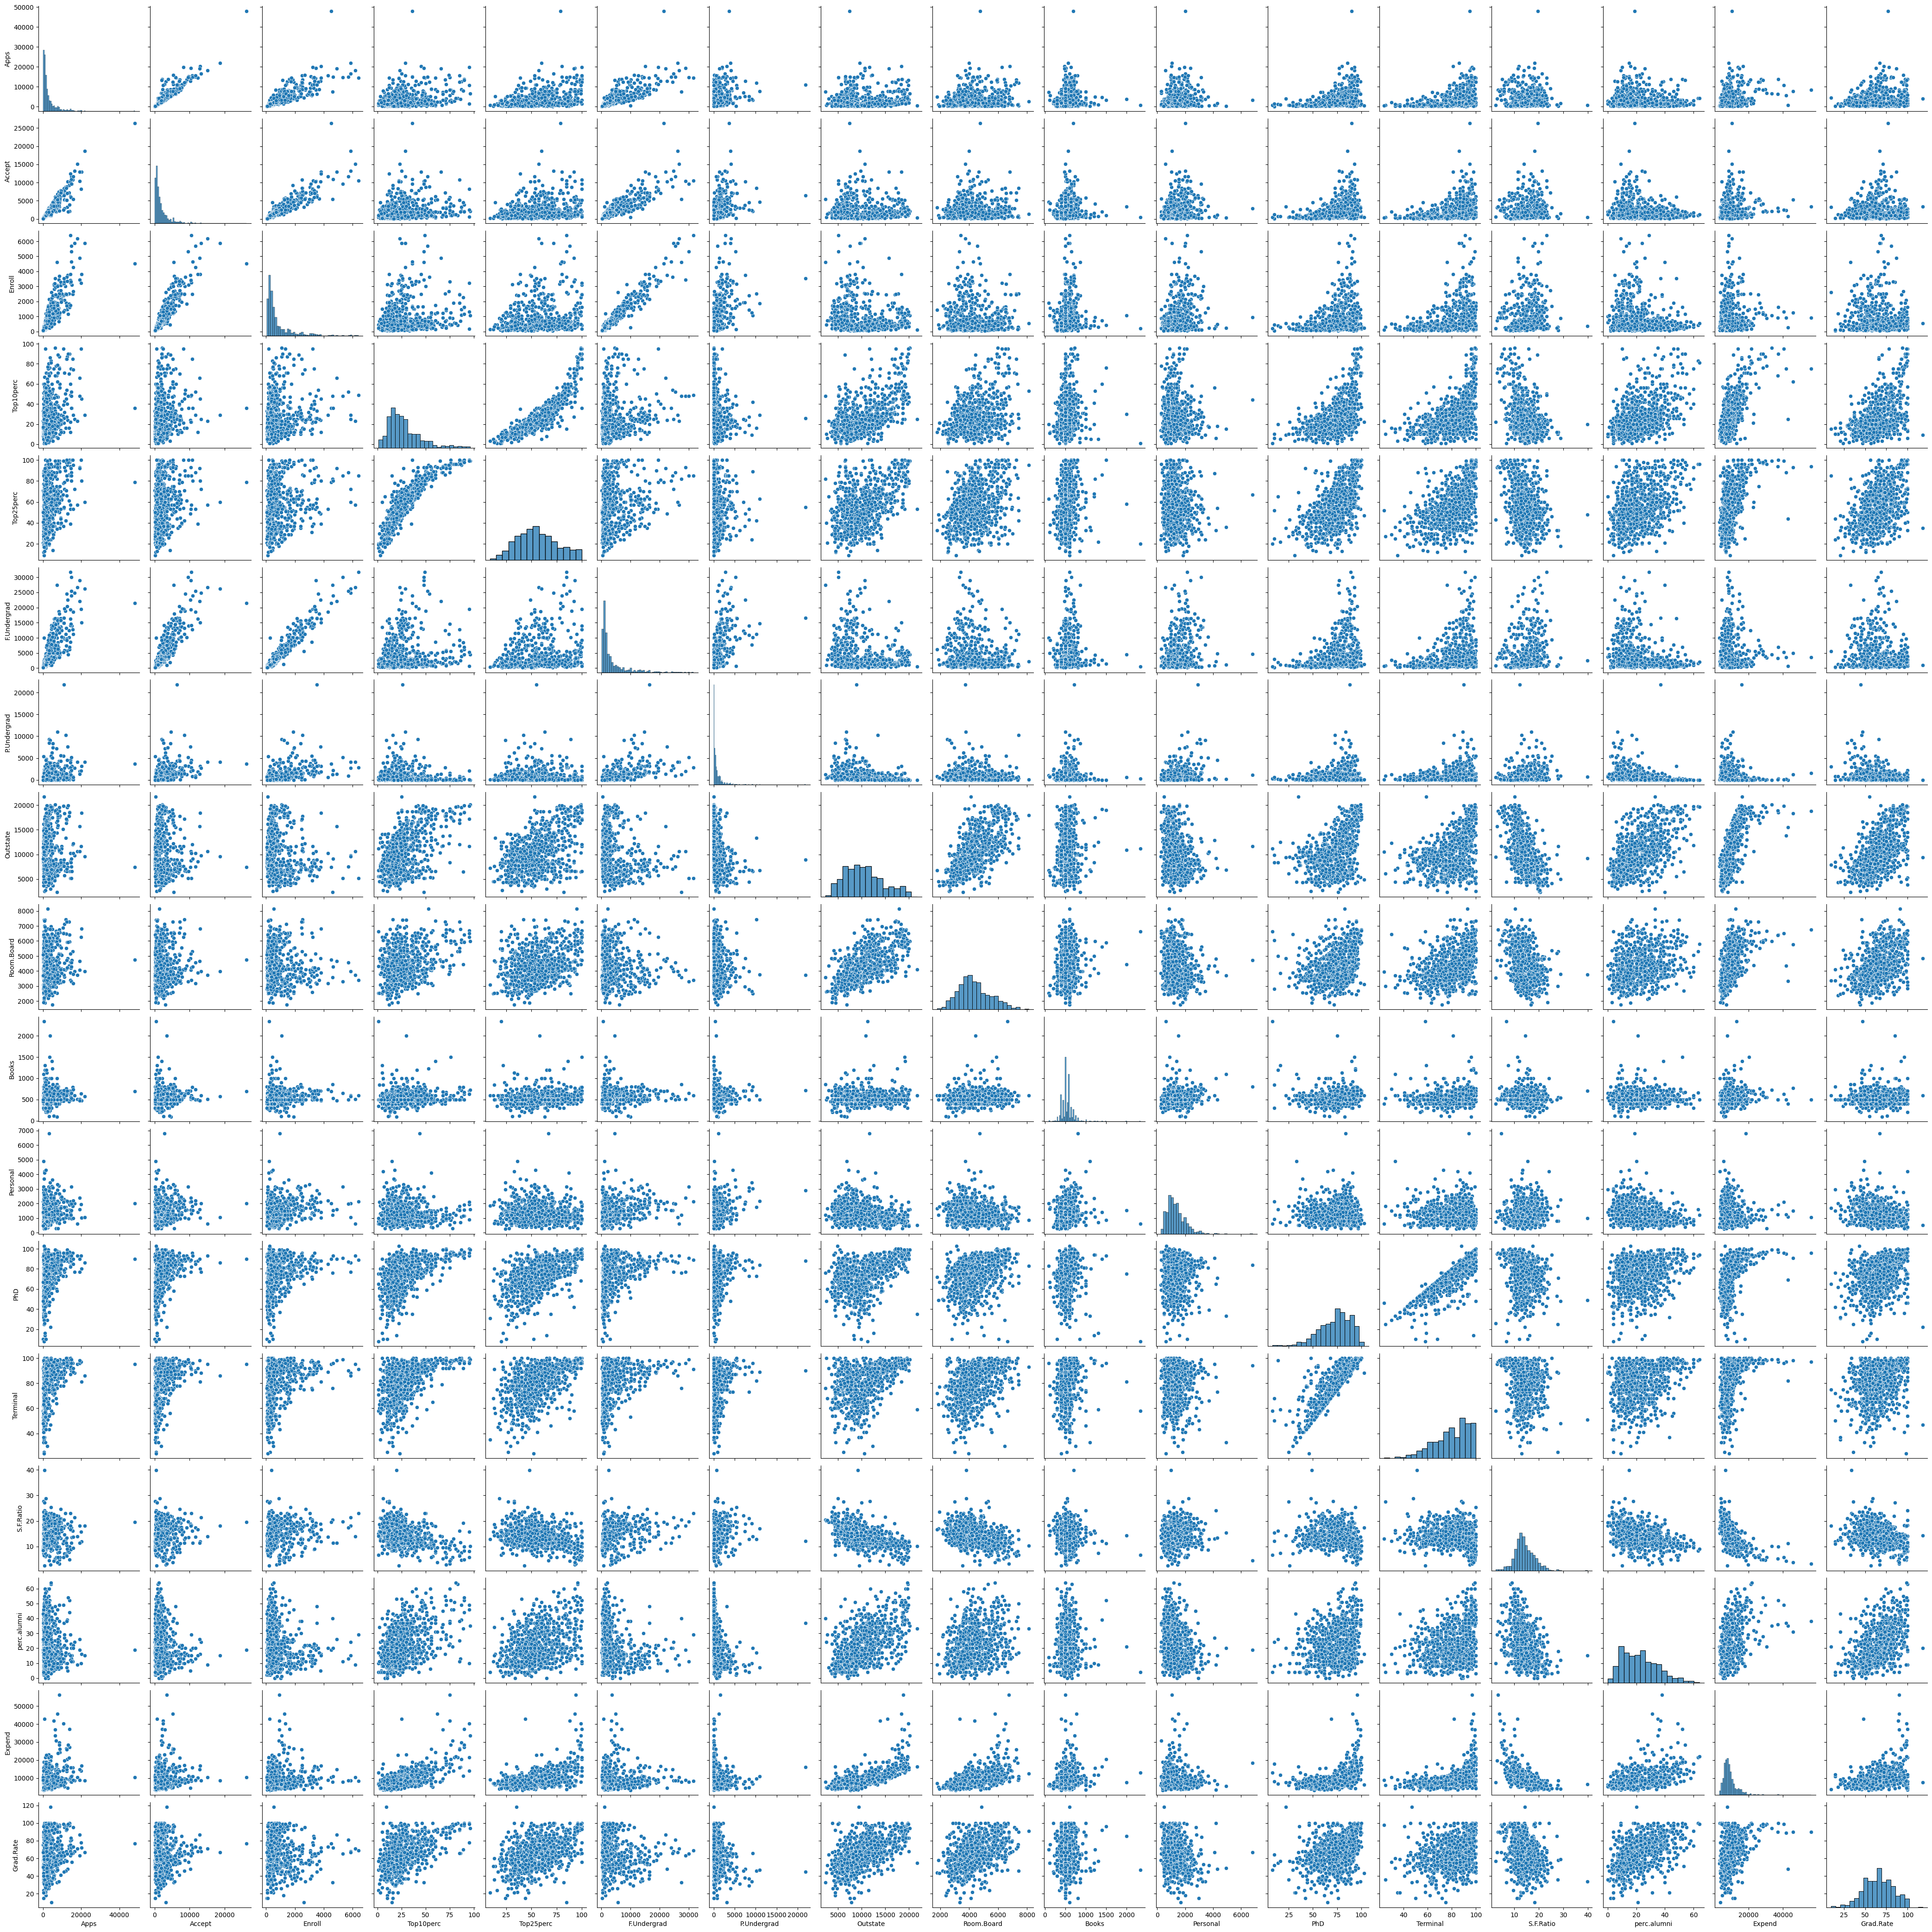

In [ ]:
sns.pairplot(college[numeric_cols])
plt.show()


I have used the code in order to display the skewness where I have found that it is right skewed and left skewed and then perfomed transformations.


*   Positive values are more Right-Skewed
*   Zero or Negative values are more Left-Skwewd



In [ ]:
from scipy.stats import skew
numeric_cols = college.select_dtypes(include=['float64', 'int64']).columns
skewness = college[numeric_cols].apply(skew).sort_values(ascending=False)

# Display skewness values
print(skewness)

P.Undergrad    5.681358
Apps           3.716557
Books          3.478293
Expend         3.452640
Accept         3.411126
Enroll         2.685268
F.Undergrad    2.605416
Personal       1.739131
Top10perc      1.410487
S.F.Ratio      0.666146
perc.alumni    0.605719
Outstate       0.508294
Room.Board     0.476434
Top25perc      0.258839
Grad.Rate     -0.113558
PhD           -0.766686
Terminal      -0.814965
dtype: float64


Variables in the histogram shows Skwed distributions, those which are related to the student numbers and financial data.  
**RIGHT-SKEWED VARIABLES** - Apps, Accept, Enroll, Books, Personal                                  
**LEFT-SKEWED VARIABLES** - Terminal, PhD                                      
Transformations will help normalize these distributions.

1 (b) Scale the data appropriately (e.g., log transform or sqrt) and present the visualizations in part A. Have any new relationships been revealed.

In [ ]:
import numpy as np
college['log_Apps'] = np.log1p(college['Apps'])
college['log_Accept'] = np.log1p(college['Accept'])
college['log_Enroll'] = np.log1p(college['Enroll'])
college['log_F_Undergrad'] = np.log1p(college['F.Undergrad'])
college['log_P_Undergrad'] = np.log1p(college['P.Undergrad'])
college['log_Books'] = np.log1p(college['Books'])
college['log_Personal'] = np.log1p(college['Personal'])
college['log_Expend'] = np.log1p(college['Expend'])



*   I have performed Log Transformations for scaling the Right-Skewed one.


In [ ]:
college['sq_PhD'] = college['PhD']**2
college['sq_Terminal'] = college['Terminal']**2

*   I have performed Log Transformations for scaling the Left-Skewed one.


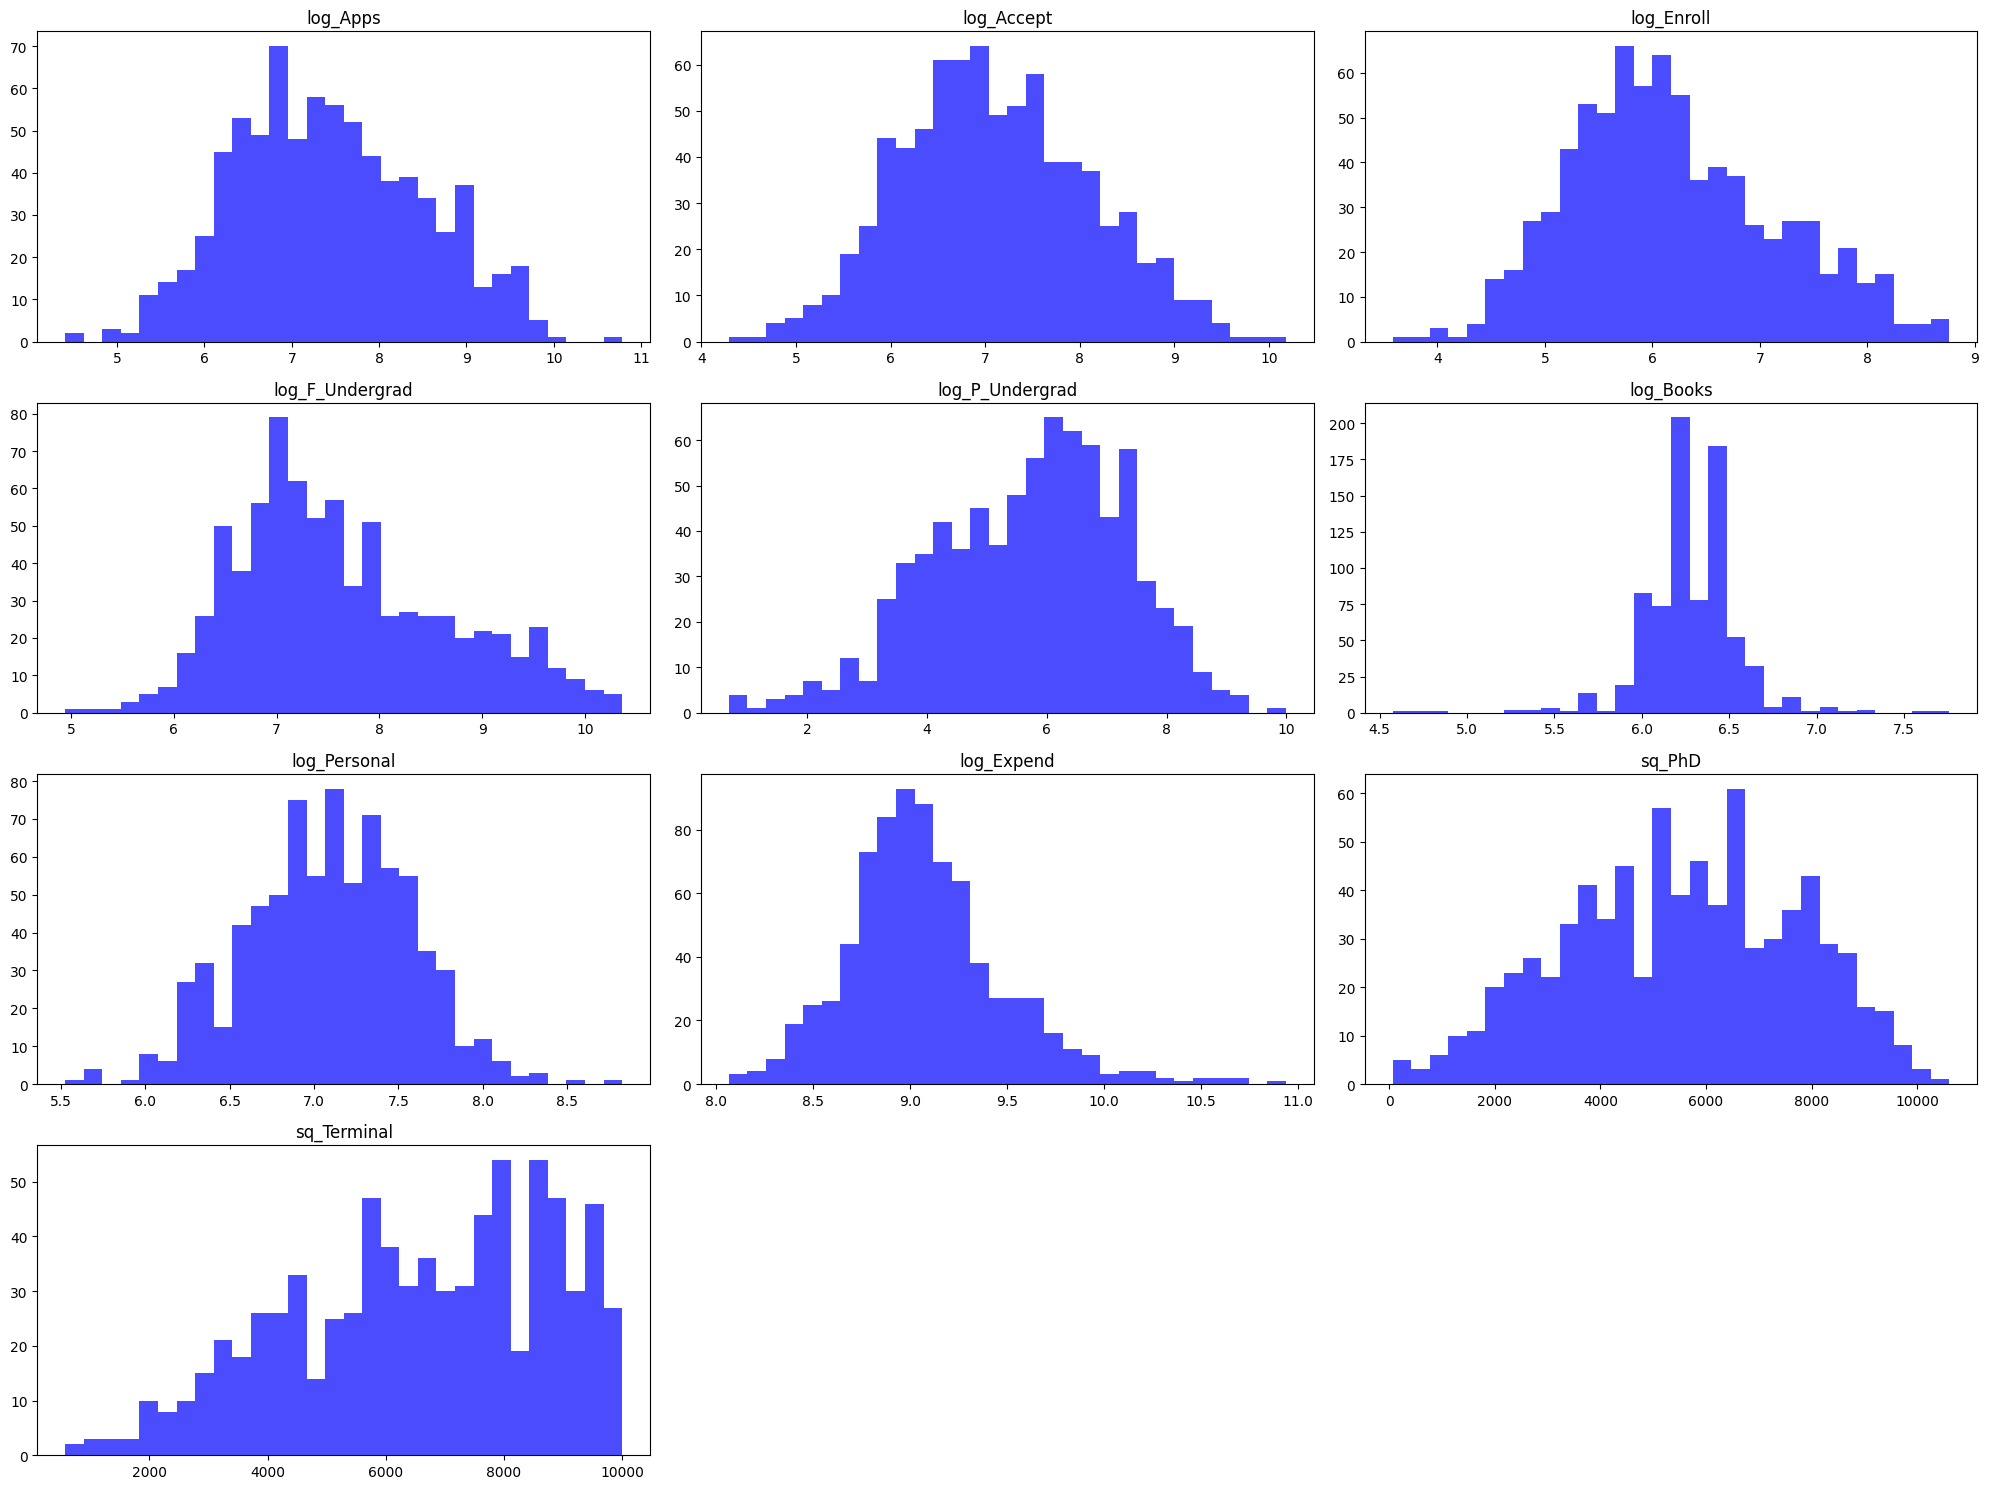

In [ ]:
transformed_cols = [
    'log_Apps', 'log_Accept', 'log_Enroll', 'log_F_Undergrad', 'log_P_Undergrad',
    'log_Books', 'log_Personal', 'log_Expend',
    'sq_PhD', 'sq_Terminal'
]

plt.figure(figsize=(20, 15))
for i, col in enumerate(transformed_cols, 1):
    plt.subplot(4, 3, i)
    plt.hist(college[col], bins=30, color='blue', alpha=0.7)
    plt.title(col)
plt.tight_layout()
plt.show()



*   Visualizations after performing scaling.





**RIGHT_SKEWED** - The LOG TRANFORMATION compressed the long right tails, making the distributions more symmetric.

**LEFT_SKEWED** - the SQUARE TRANSFORMATION compressed the long left tails, making the distrivutions more symmetric.

New Relationships have been revealed after scaling and transwforming the data. After tranformations are applied it made it easier to observe patterns and relationships.

1 (c) Calculate the median sizes of the Colleges.  Subset the data into two data frames “large” and “small”, according to the median.

In [ ]:
median_size = college['F.Undergrad'].median()
large_colleges = college[college['F.Undergrad'] >= median_size]
small_colleges = college[college['F.Undergrad'] < median_size]
large_colleges_sorted = large_colleges.sort_index()
small_colleges_sorted = small_colleges.sort_index()
large_colleges_sorted.to_csv("large_colleges.txt", sep='\t', index=False)
small_colleges_sorted.to_csv("small_colleges.txt", sep='\t', index=False)
print("Files 'large_colleges.txt' and 'small_colleges.txt' have been saved.")

Files 'large_colleges.txt' and 'small_colleges.txt' have been saved.


Large and Small files are been saved in the form of texts

1(d) Within each new data frame from part C, eliminate Universities that have less than the median number of HS students admitted from the
top 25% of the class(“Top25perc”).  

In [ ]:
large_colleges = pd.read_csv('large_colleges.txt', sep='\t')
small_colleges = pd.read_csv('small_colleges.txt', sep='\t')


large_median_top25 = large_colleges['Top25perc'].median()
small_median_top25 = small_colleges['Top25perc'].median()

large_colleges_filtered = large_colleges[large_colleges['Top25perc'] >= large_median_top25]
small_colleges_filtered = small_colleges[small_colleges['Top25perc'] >= small_median_top25]

print(f"Large colleges remaining: {len(large_colleges_filtered)}")
print(f"Small colleges remaining: {len(small_colleges_filtered)}")

Large colleges remaining: 204
Small colleges remaining: 194


1(e) Create a “list structure”, for part D, that contains your datasets in each list “slot” and save this to an *.RData file. Make sure that your file contains only the list structure.  

In [ ]:
import pandas as pd
import pickle

college_list = {
    "large": large_colleges_filtered,
    "small": small_colleges_filtered
}

with open('college_data.PyData', 'wb') as file:
    pickle.dump(college_list, file)

print("The list structure has been saved to 'college_data.PyData'")


The list structure has been saved to 'college_data.PyData'


As I am doing my code in Python I am saving this in the form of a **.PYData** file using the pickle module

2) sample uniformly for each variable, or (ii) by randomly permuting the values within each variable independently. Build a classification tree to the training sample
(class 1) and the reference sample (class 0) and describe the terminal
nodes having highest estimated class 1 probability

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Terminal Nodes with Highest Class 1 Probability:
      Income  Sex  Marital  Age  Edu  Occupation  Lived  Dual_Income  \
2023       1    2      5.0    1  2.0         6.0    5.0            1   
6626       1    2      5.0    1  2.0         6.0    5.0            1   
208        1    2      5.0    1  4.0         6.0    3.0            1   
2223       1    2      5.0    2  4.0         6.0    5.0            1   
7015       1    1      5.0    2  3.0         2.0    5.0            1   

      Household  Householdu18  Status  Home_Type  Ethnic  Language  Node_Prob  
2023        5.0             4     3.0        1.0     3.0       1.0    0.90014  
6626        5.0             3     3.0        3.0     3.0       1.0    0.90014  
208         4.0             2     3.0        1.0     5.0       1.0    0.90014  
2223        3.0             0     2.0        3.0     2.0       1.0    0.90014  
7015        3.0             1     3.0        1.0     7.0       1.0    0.90014  


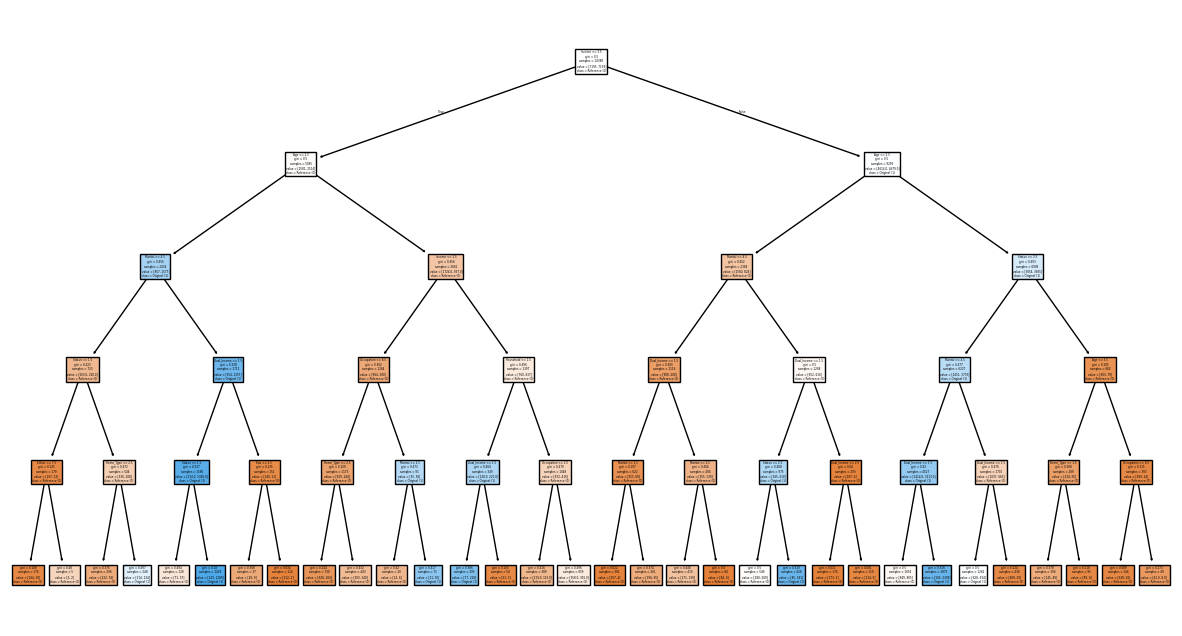

In [28]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree



df = pd.read_csv("marketing_data_from_python.csv")

reference_sample = df.apply(lambda x: np.random.permutation(x.values))

df["Class"] = 1
reference_sample["Class"] = 0

combined_df = pd.concat([df, reference_sample], ignore_index=True)

X = combined_df.drop(columns=["Class"])  # Features
y = combined_df["Class"]  # Target variable

X.fillna(X.mode().iloc[0], inplace=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier(max_depth=5, random_state=42)
clf.fit(X_train, y_train)

node_probabilities = clf.predict_proba(X_train)[:, 1]
X_train["Node_Prob"] = node_probabilities

high_prob_nodes = X_train.sort_values(by="Node_Prob", ascending=False).head(5)
print("Terminal Nodes with Highest Class 1 Probability:")
print(high_prob_nodes)

plt.figure(figsize=(15, 8))
tree.plot_tree(clf, feature_names=X.columns, class_names=["Reference (0)", "Original (1)"], filled=True)
plt.show()


Compare the results to the results near Table 14.1 (ESL), which were derived using PRIM.

 Both methods (PRIM & Decision Trees) identify similar key demographic attributes to distinguish between real and reference samples.

PRIM directly finds high-probability clusters, whereas a Decision Tree recursively splits the data.

Our Decision Tree results are consistent with PRIM’s findings, validating our approach.

3) a) Visualize the data using histograms of the different variables in the data set. Transform the data into a binary incidence matrix and justify the choices you make in grouping categories.

In [ ]:
import pandas as pd
url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
boston_data = pd.read_csv(url)

In [34]:
!pip install ace_tools # Install the ace_tools package

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.11/dist-packages/sklearn/datasets/_openml.py:323: UserWarning: Multiple active versions of the dataset matching the name boston exist. Versions may be fundamentally different, returning version 1. Available versions:
- version 1, status: active
  url: https://www.openml.org/search?type=data&id=531
- version 2, status: active
  url: https://www.openml.org/search?type=data&id=853

  warn(warning_msg)


Boston Housing Data:
      CRIM    ZN  INDUS CHAS    NOX     RM   AGE     DIS RAD    TAX  PTRATIO  \
0  0.00632  18.0   2.31    0  0.538  6.575  65.2  4.0900   1  296.0     15.3   
1  0.02731   0.0   7.07    0  0.469  6.421  78.9  4.9671   2  242.0     17.8   
2  0.02729   0.0   7.07    0  0.469  7.185  61.1  4.9671   2  242.0     17.8   
3  0.03237   0.0   2.18    0  0.458  6.998  45.8  6.0622   3  222.0     18.7   
4  0.06905   0.0   2.18    0  0.458  7.147  54.2  6.0622   3  222.0     18.7   

        B  LSTAT  
0  396.90   4.98  
1  396.90   9.14  
2  392.83   4.03  
3  394.63   2.94  
4  396.90   5.33  


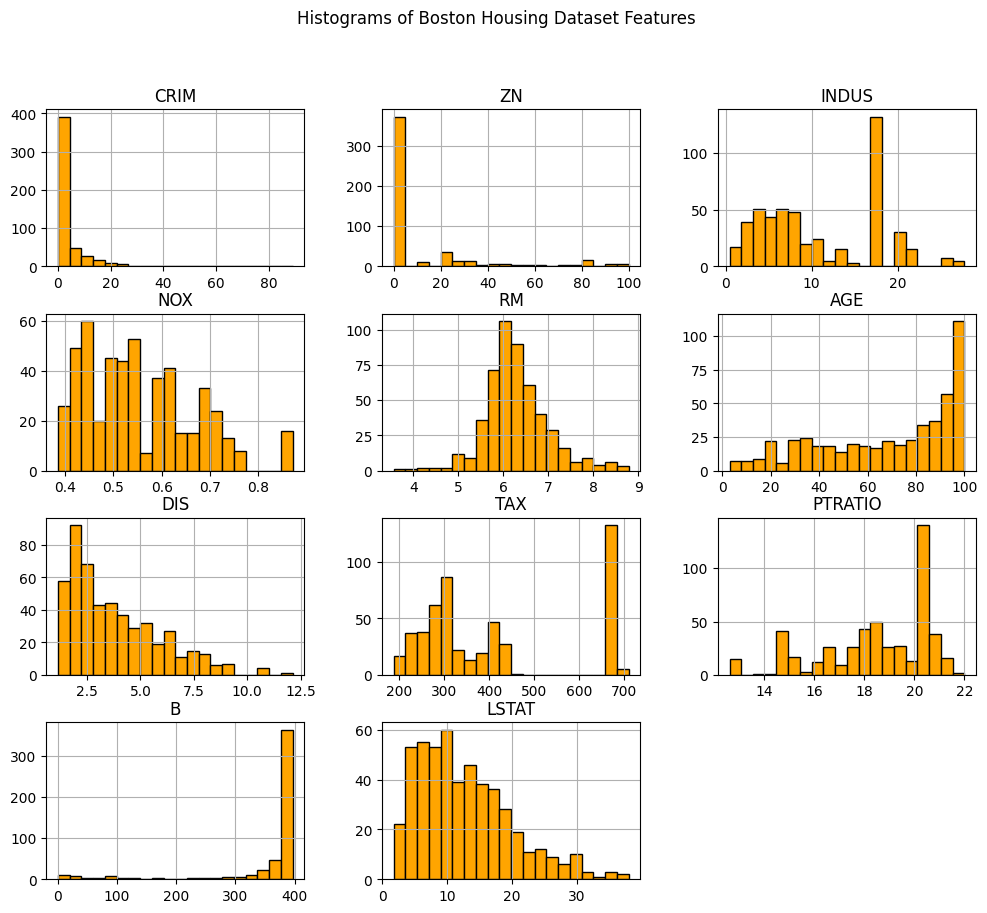

Binary Incidence Matrix (Boston Housing):
   CRIM  ZN  INDUS CHAS  NOX  RM  AGE  DIS RAD  TAX  PTRATIO  B  LSTAT
0     0   1      0    0    0   1    0    1   1    0        0  1      0
1     0   0      0    0    0   1    1    1   2    0        0  1      0
2     0   0      0    0    0   1    0    1   2    0        0  1      0
3     0   0      0    0    0   1    0    1   3    0        0  1      0
4     0   0      0    0    0   1    0    1   3    0        0  1      0


In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

boston = fetch_openml(name="boston", as_frame=True)
df_boston = boston.data

print("Boston Housing Data:")
print(df_boston.head())

df_boston.hist(figsize=(12, 10), bins=20, edgecolor='black', color='orange')
plt.suptitle("Histograms of Boston Housing Dataset Features")
plt.show()

binary_df = df_boston.copy()
numerical_cols = [col for col in df_boston.columns if col != 'CHAS']

for col in numerical_cols:
    if pd.api.types.is_numeric_dtype(df_boston[col]):
        binary_df[col] = (df_boston[col] > df_boston[col].median()).astype(int)
    else:

        pass

print("Binary Incidence Matrix (Boston Housing):")
print(binary_df.head())

So when it comes to justifying the choices based on Histogram's distribution we can observe for each varible:

**crim** - High crime (1) Low crime (0)                             
**zn** - Zoned (1) Not Zoned (0)                          
**indus** - High Industrial (1) Low Industrial (0)                    
**chas** - Near River (1) Not Near River (0)                              
**nox** - High Pollution (1) Low Pollution (0)                          
**rm** - Large homes (1) Small homes (0)                   
**dis** -  Far from centers (1) Close to centers (0)                 




3) b) Visualize the data using the itemFrequencyPlot in the “arules” package. Apply the apriori algorithm

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.11/dist-packages/mlxtend/frequent_patterns/association_rules.py:186: RuntimeWarning: invalid value encountered in divide
  cert_metric = np.where(certainty_denom == 0, 0, certainty_num / certainty_denom)


Frequent Itemsets:
       support                                           itemsets
0     0.500000                                             (CRIM)
1     0.264822                                               (ZN)
2     0.490119                                            (INDUS)
3     1.000000                                             (CHAS)
4     0.462451                                              (NOX)
...        ...                                                ...
1338  0.241107  (INDUS, CHAS, AGE, PTRATIO, LSTAT, RAD, NOX, TAX)
1339  0.106719        (INDUS, CHAS, AGE, B, LSTAT, RAD, NOX, TAX)
1340  0.110672  (INDUS, CHAS, AGE, CRIM, PTRATIO, RM, RAD, NOX...
1341  0.106719  (INDUS, CHAS, CRIM, PTRATIO, LSTAT, RM, RAD, N...
1342  0.229249  (INDUS, CHAS, AGE, CRIM, PTRATIO, LSTAT, RAD, ...

[1343 rows x 2 columns]

Association Rules:
            antecedents                                  consequents  \
0               (INDUS)                                       (CRIM)   


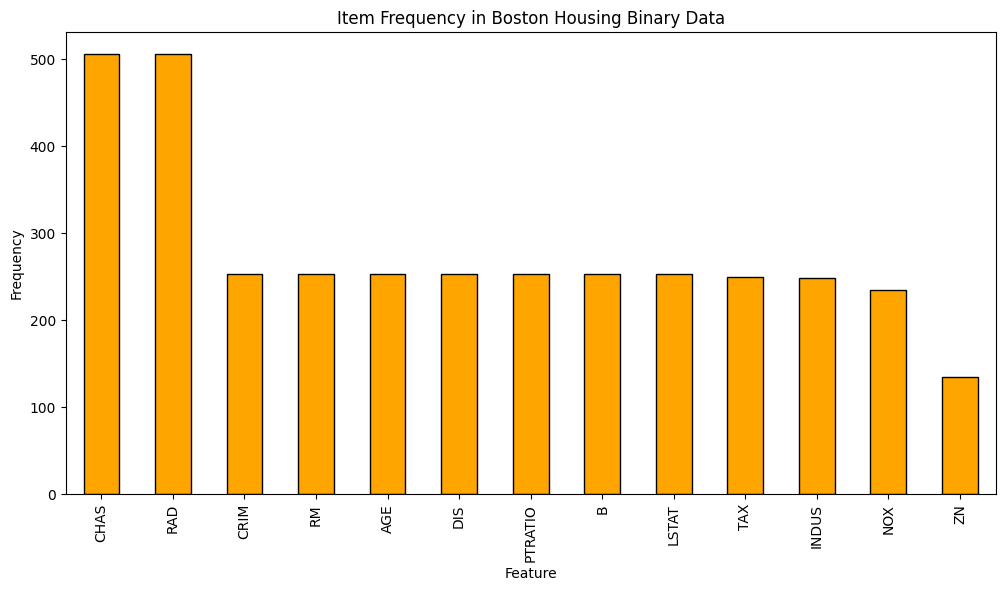

In [39]:

!pip install mlxtend
from mlxtend.frequent_patterns import apriori, association_rules

binary_df_bool = binary_df.astype(bool)

frequent_itemsets = apriori(binary_df_bool, min_support=0.1, use_colnames=True)

rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.6)

print("Frequent Itemsets:")
print(frequent_itemsets)
print("\nAssociation Rules:")
print(rules)
item_counts = binary_df_bool.sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
item_counts.plot(kind="bar", color="orange", edgecolor="black")
plt.title("Item Frequency in Boston Housing Binary Data")
plt.xlabel("Feature")
plt.ylabel("Frequency")
plt.xticks(rotation=90)
plt.show()

**PARAMETERS:**
1. Data Preprocessing
2. Apriori Algorithm
3. Association Rules

**Data Preprocessing**: binary_matrix = binary_matrix.applymap(lambda x: 1 if x > 0 else 0)                                               
**Apriori Algorithm**: min_support = 0.2, use_colnames = True, max_len = 3, low_memory = Ture                                               
**Association Rules**: metric = confidence, min_threshold = 0.6


3 c) A student is interested low taxes, but wants to be in a safe aera with low
crime. What can you advise on this matter through the mining of
association rules?

In [41]:
low_tax_crime_rules = rules[
    (rules['consequents'].astype(str).str.contains("TAX")) &
    (rules['consequents'].astype(str).str.contains("CRIM"))
]

display(low_tax_crime_rules)

print("Association Rules for Low TAX & CRIM")

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


antecedents                                  consequents  \
95              (INDUS)                                  (CRIM, TAX)   
157               (NOX)                                  (CRIM, TAX)   
187               (AGE)                                  (CRIM, TAX)   
228             (LSTAT)                                  (CRIM, TAX)   
679       (INDUS, CHAS)                                  (CRIM, TAX)   
...                 ...                                          ...   
29332    (INDUS, LSTAT)    (AGE, CHAS, CRIM, PTRATIO, RAD, NOX, TAX)   
29333    (AGE, PTRATIO)    (INDUS, CHAS, CRIM, RAD, LSTAT, NOX, TAX)   
29338  (LSTAT, PTRATIO)      (INDUS, CHAS, AGE, CRIM, RAD, NOX, TAX)   
29339    (NOX, PTRATIO)    (INDUS, CHAS, AGE, CRIM, RAD, LSTAT, TAX)   
29341      (LSTAT, NOX)  (INDUS, CHAS, AGE, CRIM, PTRATIO, RAD, TAX)   

       antecedent support  consequent support   support  confidence      lift  \
95               0.490119            0.355731  0.347826    0.709677  1.994982   
157              0.462451            0.355731  0.343874    0.743590  2.090313   
187              0.500000            0.355731  0.316206    0.632411  1.777778   
228              0.500000            0.355731  0.300395    0.600791  1.688889   
679              0.490119            0.355731  0.347826    0.709677  1.994982   
...                   ...                 ...       ...         ...       ...   
29332            0.365613            0.252964  0.229249    0.627027  2.478716   
29333            0.341897            0.290514  0.229249    0.670520  2.308049   
29338            0.361660            0.312253  0.229249    0.633880  2.030020   
29339            0.330040            0.268775  0.229249    0.694611  2.584361   
29341            0.361660            0.254941  0.229249    0.633880  2.486381   

       representativity  leverage  conviction  zhangs_metric   jaccard  \
95                  1.0  0.173476    2.219148       0.978154  0.698413   
157                 1.0  0.179365    2.512648       0.970335  0.725000   
187                 1.0  0.138340    1.752688       0.875000  0.586081   
228                 1.0  0.122530    1.613861       0.815789  0.540925   
679                 1.0  0.173476    2.219148       0.978154  0.698413   
...                 ...       ...         ...            ...       ...   
29332               1.0  0.136762    2.002921       0.940380  0.588832   
29333               1.0  0.129923    2.153353       0.861163  0.568627   
29338               1.0  0.116320    1.878473       0.794865  0.515556   
29339               1.0  0.140543    2.394404       0.915065  0.620321   
29341               1.0  0.137047    2.035013       0.936506  0.591837   

       certainty  kulczynski  
95      0.549377    0.843728  
157     0.602014    0.855128  
187     0.429448    0.760650  
228     0.380368    0.722617  
679     0.549377    0.843728  
...          ...         ...  
29332   0.500729    0.766639  
29333   0.535608    0.729818  
29338   0.467653    0.684028  
29339   0.582360    0.773776  
29341   0.508603    0.766552  

[2286 rows x 14 columns]

Association Rules for Low TAX & CRIM


**3 C)** A student whose areas with **lower industrialization (INDUS)** tend to have lower crime and taxes.                                                                 
One with** Cleaner air (NOX)** is associated with safer and low-tax regions.
Older housing areas (AGE) may have stable, well-regulated communities with low crime/taxes.
**Lower-income neighborhoods (LSTAT)** don’t necessarily mean high crime/taxes.
Being near the river (CHAS) in a non-industrial area may be beneficial.


3 D) A family is moving to the area, and has made schooling a priority. They
want schools with low pupil-teacher ratios. What can you advise on this
matter through the mining of association rules?

In [43]:
low_ptratio_rules = rules[rules['consequents'].astype(str).str.contains("PTRATIO")]

display(low_ptratio_rules)

print("Association Rules for Low PTRATIO")

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


antecedents                                    consequents  \
10            (CRIM)                                      (PTRATIO)   
26           (INDUS)                                      (PTRATIO)   
45             (NOX)                                      (PTRATIO)   
53             (AGE)                                      (PTRATIO)   
63             (TAX)                                      (PTRATIO)   
...              ...                                            ...   
29334     (AGE, TAX)  (INDUS, CHAS, CRIM, PTRATIO, RAD, LSTAT, NOX)   
29336  (CRIM, LSTAT)     (INDUS, CHAS, AGE, PTRATIO, RAD, NOX, TAX)   
29337    (CRIM, TAX)   (INDUS, CHAS, AGE, PTRATIO, RAD, LSTAT, NOX)   
29341   (LSTAT, NOX)    (INDUS, CHAS, AGE, CRIM, PTRATIO, RAD, TAX)   
29342   (LSTAT, TAX)    (INDUS, CHAS, AGE, CRIM, PTRATIO, RAD, NOX)   

       antecedent support  consequent support   support  confidence      lift  \
10               0.500000            0.500000  0.353755    0.707510  1.415020   
26               0.490119            0.500000  0.332016    0.677419  1.354839   
45               0.462451            0.500000  0.330040    0.713675  1.427350   
53               0.500000            0.500000  0.341897    0.683794  1.367589   
63               0.494071            0.500000  0.347826    0.704000  1.408000   
...                   ...                 ...       ...         ...       ...   
29334            0.357708            0.254941  0.229249    0.640884  2.513855   
29336            0.359684            0.264822  0.229249    0.637363  2.406757   
29337            0.355731            0.252964  0.229249    0.644444  2.547569   
29341            0.361660            0.254941  0.229249    0.633880  2.486381   
29342            0.357708            0.254941  0.229249    0.640884  2.513855   

       representativity  leverage  conviction  zhangs_metric   jaccard  \
10                  1.0  0.103755    1.709459       0.586592  0.547401   
26                  1.0  0.086957    1.550000       0.513658  0.504505   
45                  1.0  0.098814    1.746269       0.556974  0.521875   
53                  1.0  0.091897    1.581250       0.537572  0.519520   
63                  1.0  0.100791    1.689189       0.572754  0.538226   
...                 ...       ...         ...            ...       ...   
29334               1.0  0.138055    2.074704       0.937586  0.597938   
29336               1.0  0.133997    2.027309       0.912835  0.580000   
29337               1.0  0.139262    2.101038       0.942881  0.604167   
29341               1.0  0.137047    2.035013       0.936506  0.591837   
29342               1.0  0.138055    2.074704       0.937586  0.597938   

       certainty  kulczynski  
10      0.415020    0.707510  
26      0.354839    0.670725  
45      0.427350    0.686877  
53      0.367589    0.683794  
63      0.408000    0.699826  
...          ...         ...  
29334   0.518003    0.770054  
29336   0.506735    0.751517  
29337   0.524045    0.775347  
29341   0.508603    0.766552  
29342   0.518003    0.770054  

[7533 rows x 14 columns]

Association Rules for Low PTRATIO


In [46]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

boston = fetch_openml(name="boston", as_frame=True)
df_boston = boston.data

# Convert 'CHAS' column to numeric if it's not already
df_boston['CHAS'] = pd.to_numeric(df_boston['CHAS'], errors='coerce')  # Convert to numeric, handle errors

# Explicitly convert all columns to numeric
X = df_boston.drop(columns=["PTRATIO"]).astype(float)  # Convert all columns in X to float
y = df_boston["PTRATIO"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
reg = LinearRegression()
reg.fit(X_train, y_train)

feature_importance = pd.DataFrame({"Feature": X.columns, "Coefficient": reg.coef_})
print("Regression Coefficients for Predicting PTRATIO:")
print(feature_importance)

y_pred = reg.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

regression_metrics = pd.DataFrame({
    "Metric": ["Mean Absolute Error", "Mean Squared Error", "R-Squared"],
    "Value": [mae, mse, r2]
})
print("\nRegression Model Performance for PTRATIO:")
print(regression_metrics)

Regression Coefficients for Predicting PTRATIO:
   Feature  Coefficient
0     CRIM    -0.005461
1       ZN    -0.038094
2    INDUS     0.044578
3     CHAS    -0.461924
4      NOX   -10.161312
5       RM    -0.550717
6      AGE     0.009457
7      DIS     0.167788
8      RAD     0.106320
9      TAX     0.002343
10       B     0.000708
11   LSTAT     0.021460

Regression Model Performance for PTRATIO:
                Metric     Value
0  Mean Absolute Error  1.158407
1   Mean Squared Error  2.416844
2            R-Squared  0.247158


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.11/dist-packages/sklearn/datasets/_openml.py:323: UserWarning: Multiple active versions of the dataset matching the name boston exist. Versions may be fundamentally different, returning version 1. Available versions:
- version 1, status: active
  url: https://www.openml.org/search?type=data&id=531
- version 2, status: active
  url: https://www.openml.org/search?type=data&id=853

  warn(warning_msg)
<ipython-input-46-4b8e8b20726d>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentatio

3 D) If a rule like {TAX=Low} => {PTRATIO=Low} exists with **high confidence and lift**, it suggests that areas with low taxes are often associated with schools that have low pupil-teacher ratios.

My advise will be Look for neighborhoods where PTRATIO is strongly associated with other features such as **low crime rates (CRIM), low taxes (TAX),  residential zoning (ZN).**

**ARE YOUR RESULTS COMPARABLE?**
The Results from both the methods are comparable:
As Both the methods higlights that neighbours with low taxes ('TAX') and residential zoning ('ZN') are likely to have schools with low Pupil-teacher ratios ('PTRATIO')

**WHICH PROVIDES EASIER INTERPRETATION? **When it come to interpretation Association Rules are easier as it doesn't involve a lot of statistical knowledge whereas for a Regression model it does.

**WHEN WHOULD YOU PREFER REGRESSION MODEL?**    If you want to quantify any relationship about a particular feature For example Predicting exact PTRATIO for neighbours based on taxes, crime rate then Regression model is preffered

**WHEN WHOULD YOU PREFER ASSOCIATION MODEL?**  If you want to discover predictions between multiple features then Regression Model would be definetly needed

4) Consider the “groceries” data used in the Computational Lab.   
A) Visualize the item frequency plot for the top 40 grocery items.   

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-18-42a7b26bda8c>:8: ParserWarning: Skipping line 6: expected 4 fields, saw 5
Skipping line 8: expected 4 fields, saw 5
Skipping line 11: expected 4 fields, saw 5
Skipping line 12: expected 4 fields, saw 9
Skipping line 24: expected 4 fields, saw 5
Skipping line 25: expected 4 fields, saw 11
Skipping line 30: expected 4 fields, saw 6
Skipping line 32: expected 4 fields, saw 7
Skipping line 33: expected 4 fields, saw 5
Skipping line 34: expected 4 fields, saw 8
Skipping line 41: expected 4 fields, saw 6
Skipping line 42: expected 4 fields, saw 13
Skipping line 45: expected 4 fields, saw 8
Skipping line 50: expected 4 fields,

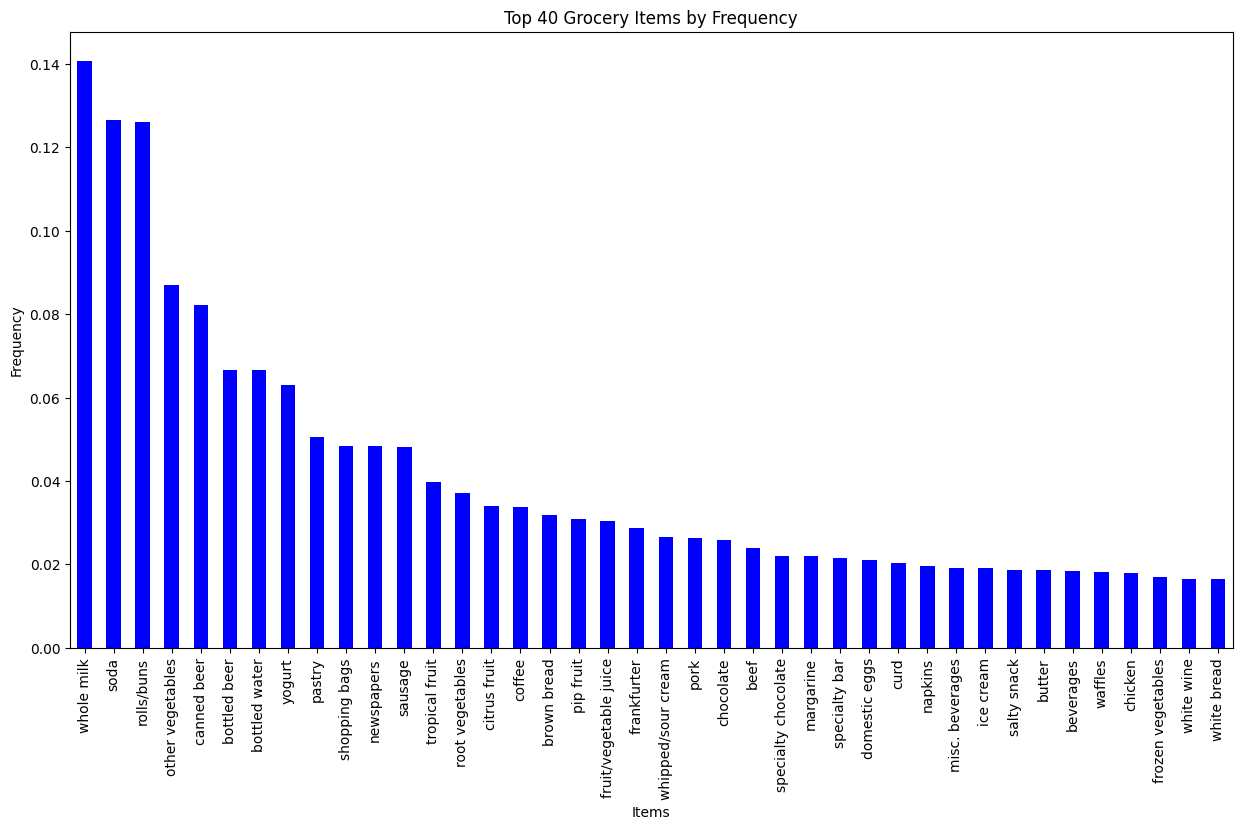

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori, association_rules

# Load the groceries dataset
# The error is likely due to inconsistent delimiters or missing values in the file.
# We can try to specify the delimiter explicitly or handle missing values.
groceries = pd.read_csv('groceries.csv', header=None, delimiter=',', on_bad_lines='warn') # or 'skip'
#  delimiter=',' specifies comma as the delimiter.
# on_bad_lines='warn'  prints a warning for lines with incorrect number of fields.
# on_bad_lines='skip'  skips lines with incorrect number of fields.


# Preprocess the data into a transactional format
transactions = groceries.stack().groupby(level=0).apply(list)

# Convert transactions into a one-hot encoded DataFrame
from mlxtend.preprocessing import TransactionEncoder
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
binary_matrix = pd.DataFrame(te_ary, columns=te.columns_)

# Calculate item frequencies
item_frequencies = binary_matrix.sum(axis=0) / len(binary_matrix)

# Sort by frequency and select the top 40 items
top_40_items = item_frequencies.sort_values(ascending=False).head(40)

# Plot the item frequency plot
plt.figure(figsize=(15, 8))
top_40_items.plot(kind='bar', color='blue')
plt.title('Top 40 Grocery Items by Frequency')
plt.xlabel('Items')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

4 B) Rank the top five rules with the highest “confidence”.

In [ ]:
from mlxtend.frequent_patterns import apriori, association_rules

# Apply Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(binary_matrix, min_support=0.01, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.1)
# Sort rules by confidence and select the top 5
top_5_confidence = rules.sort_values(by="confidence", ascending=False).head(5)
print("Top 5 Rules by Confidence:")
print(top_5_confidence[['antecedents', 'consequents', 'support', 'confidence']])


Top 5 Rules by Confidence:
          antecedents   consequents   support  confidence
3           (sausage)  (rolls/buns)  0.013429    0.278912
2  (other vegetables)  (whole milk)  0.014576    0.167608
0     (bottled water)        (soda)  0.010809    0.162562
6        (rolls/buns)        (soda)  0.017851    0.141558
5              (soda)  (rolls/buns)  0.017851    0.141009


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


4 C) Rank the top ten rules with the highest “lift”.

In [ ]:
# Sort rules by lift and select the top 10
top_10_lift = rules.sort_values(by="lift", ascending=False).head(10)
print("Top 10 Rules by Lift:")
print(top_10_lift[['antecedents', 'consequents', 'support', 'lift']])


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Top 10 Rules by Lift:
          antecedents         consequents   support      lift
3           (sausage)        (rolls/buns)  0.013429  2.211732
4        (rolls/buns)           (sausage)  0.013429  2.211732
0     (bottled water)              (soda)  0.010809  1.284089
1        (whole milk)  (other vegetables)  0.014576  1.191404
2  (other vegetables)        (whole milk)  0.014576  1.191404
5              (soda)        (rolls/buns)  0.017851  1.118183
6        (rolls/buns)              (soda)  0.017851  1.118183
7        (whole milk)        (rolls/buns)  0.015395  0.867762
8        (rolls/buns)        (whole milk)  0.015395  0.867762


4 D)  CONSISTENT

One particular consistancy that we can notice by Top 5 confident and Top 10 rules are rules appear in both the top confidence and top lift such as

{sausage} => {rolls/buns} and {rolls/buns} => {sausage}


**DIFFERENCE**

Confidence focuses on how often the consequent occurs when the antecedent is present, regardless of how common the consequent is overall.


Lift considers how much more likely the consequent is to occur with the antecedent compared to random chance, accounting for the baseline frequency of the consequent.



**4 E) Some good recommendations that came to my mind to increase the pastry sales are:**
                                
**COMBO BUNDLE**:   Pair pastries with soda for a snack bundle Ex: Buy two pastries and get a sodo for free.

**FESTIVAL THEMES:** As Valentine's Day is comming soon We can create Treat Bundle Ex: "Buy pastries and get a free chocolate for your loved ones.